In [ ]:
#Random forest model to predict if Apple will over/underperform the S&P 500
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

aapl = yf.download('AAPL', start='2010-01-01', end='2024-01-01', progress=False)
sp500 = yf.download('^GSPC', start='2010-01-01', end='2024-01-01', progress=False)

aapl['Return'] = (aapl['Close'].shift(-21) - aapl['Close']) / aapl['Close']
sp500['Return'] = (sp500['Close'].shift(-21) - sp500['Close']) / sp500['Close']

print(aapl[['Close', 'Return']].head(25))
print(sp500[['Close', 'Return']].head(25))

data = pd.DataFrame(index=aapl.index)
data['AAPL_Return'] = aapl['Return']
data['SP500_Return'] = sp500['Return']
data['Target'] = (data['AAPL_Return'] > data['SP500_Return']).astype(int)

data.dropna(inplace=True)

X = data[['AAPL_Return', 'SP500_Return']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

new_data = X_test.iloc[-1:].copy()  
prediction = model.predict(new_data)
print("Prediction: ", "AAPL will outperform S&P 500" if prediction[0] == 1 else "AAPL will underperform S&P 500")

               Close    Return
Date                          
2010-01-04  7.643214 -0.069062
2010-01-05  7.656429 -0.104161
2010-01-06  7.534643 -0.073518
2010-01-07  7.520714 -0.078165
2010-01-08  7.570714 -0.074488
2010-01-11  7.503929 -0.071344
2010-01-12  7.418571 -0.043568
2010-01-13  7.523214 -0.048754
2010-01-14  7.479643 -0.028792
2010-01-15  7.354643 -0.016413
2010-01-19  7.680000 -0.056315
2010-01-20  7.561786 -0.047513
2010-01-21  7.431071 -0.036766
2010-01-22  7.062500 -0.003489
2010-01-25  7.252500 -0.011868
2010-01-26  7.355000 -0.019132
2010-01-27  7.424286 -0.015682
2010-01-28  7.117500  0.048673
2010-01-29  6.859286  0.087421
2010-02-01  6.954643  0.074976
2010-02-02  6.995000  0.075819
2010-02-03  7.115357  0.098981
2010-02-04  6.858929  0.140745
2010-02-05  6.980714  0.141001
2010-02-08  6.932857  0.158253
                  Close    Return
Date                             
2010-01-04  1132.989990 -0.031518
2010-01-05  1136.520020 -0.064592
2010-01-06  1137.140015 -0.

In [6]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [0.9957204  0.98857143 0.98714286 0.95285714 0.97285714]
Mean CV Score: 0.9794297941715916


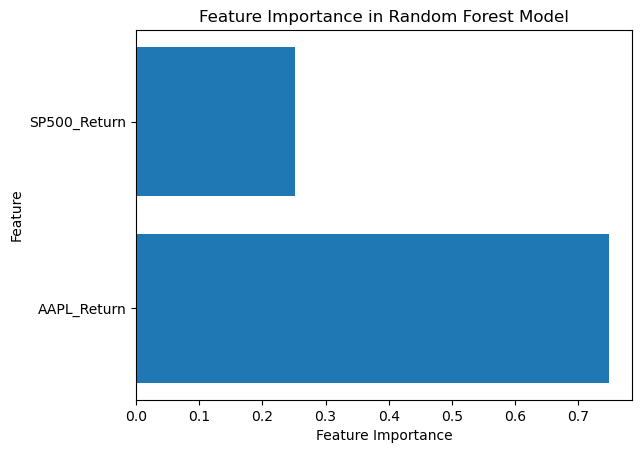

In [7]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()

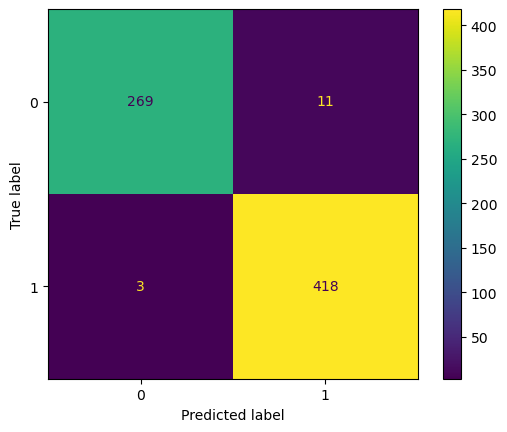

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()